# Scan the yahoo finance for the stock symbol appeared in the news.
Stock trading has one of the most complex and complicated dynamics in the present day world. In today’s time, multiple algorithms and researches have been produced to understand the complexity of the stocks trading. There is an increasing effort to understand the system dynamics of stock trading to predict the emergent behaviour of the stock prices.

In order to predict stock prices adequately, one needs to have access to historical data of the stock prices. Mostly, you will be focussed towards one stock and it’s a predicted value. In order to obtain the historical data of the stock prices, you can use data service providers or you can make use of simple web scrapers to perform this job. This task can be carried out by scraping websites which provide stock prices data. You can proceed with scraping Nasdaq news website or scraping Yahoo finance website for stock prices data!


Get the stock price and volume of last 5 days

In [62]:
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'AAPL'

url = 'https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above
page = requests.get(url, headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want
tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element
tree.xpath("//h1/text()")

['Apple Inc. (AAPL)']

In [5]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df_b = pd.DataFrame(parsed_rows)
df_b

,0,1,2,3,4
0,Breakdown,9/30/2020,9/30/2019,9/30/2018,9/30/2017
1,Total Assets,"323,888,000","338,516,000","365,725,000","375,319,000"
2,Total Liabilities Net Minority Interest,"258,549,000","248,028,000","258,578,000","241,272,000"
3,Total Equity Gross Minority Interest,"65,339,000","90,488,000","107,147,000","134,047,000"
4,Total Capitalization,"164,006,000","182,295,000","200,882,000","231,254,000"
5,Common Stock Equity,"65,339,000","90,488,000","107,147,000","134,047,000"
6,Net Tangible Assets,"65,339,000","90,488,000","107,147,000","126,032,000"
7,Working Capital,"38,321,000","57,101,000","14,473,000","27,831,000"
8,Invested Capital,"177,775,000","198,535,000","221,630,000","249,727,000"
9,Tangible Book Value,"65,339,000","90,488,000","107,147,000","126,032,000"


In [6]:
df_b = pd.DataFrame(parsed_rows)
df_b = df_b.set_index(0) # Set the index to the first column: 'Period Ending'.
df_b = df_b.transpose() # Transpose the DataFrame, so that our header contains the account names

# Rename the "Breakdown" column to "Date"
cols = list(df_b.columns)
cols[0] = 'Date'
df_b = df_b.set_axis(cols, axis='columns', inplace=False)

df_b

,Date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number
1,9/30/2020,"323,888,000","258,549,000","65,339,000","164,006,000","65,339,000","65,339,000","38,321,000","177,775,000","65,339,000","112,436,000","74,420,000","16,976,763","16,976,763"
2,9/30/2019,"338,516,000","248,028,000","90,488,000","182,295,000","90,488,000","90,488,000","57,101,000","198,535,000","90,488,000","108,047,000","59,203,000","17,772,944","17,772,944"
3,9/30/2018,"365,725,000","258,578,000","107,147,000","200,882,000","107,147,000","107,147,000","14,473,000","221,630,000","107,147,000","114,483,000","88,570,000","19,019,944","19,019,944"
4,9/30/2017,"375,319,000","241,272,000","134,047,000","231,254,000","134,047,000","126,032,000","27,831,000","249,727,000","126,032,000","115,680,000","95,391,000","20,504,804","20,504,804"


In [7]:
df_b.dtypes

Date                                       object
Total Assets                               object
Total Liabilities Net Minority Interest    object
Total Equity Gross Minority Interest       object
Total Capitalization                       object
Common Stock Equity                        object
Net Tangible Assets                        object
Working Capital                            object
Invested Capital                           object
Tangible Book Value                        object
Total Debt                                 object
Net Debt                                   object
Share Issued                               object
Ordinary Shares Number                     object
dtype: object

In [8]:
numeric_columns = list(df_b.columns)[1::] # Take all columns, except the first (which is the 'Date' column)

for column_name in numeric_columns:
    df_b[column_name] = df_b[column_name].str.replace(',', '') # Remove the thousands separator
    df_b[column_name] = df_b[column_name].astype(np.float64) # Convert the column to float64

df_b.dtypes

Date                                        object
Total Assets                               float64
Total Liabilities Net Minority Interest    float64
Total Equity Gross Minority Interest       float64
Total Capitalization                       float64
Common Stock Equity                        float64
Net Tangible Assets                        float64
Working Capital                            float64
Invested Capital                           float64
Tangible Book Value                        float64
Total Debt                                 float64
Net Debt                                   float64
Share Issued                               float64
Ordinary Shares Number                     float64
dtype: object

In [9]:
df_b.shape

(4, 14)

In [10]:
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

def get_page(url):
    # Set up the request headers that we're going to use, to simulate
    # a request by the Chrome browser. Simulating a request from a browser
    # is generally good practice when building a scraper
    headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
        'Cache-Control': 'max-age=0',
        'Pragma': 'no-cache',
        'Referrer': 'https://google.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
    }

    return requests.get(url, headers=headers)

def parse_rows(table_rows):
    parsed_rows = []

    for table_row in table_rows:
        parsed_row = []
        el = table_row.xpath("./div")

        none_count = 0

        for rs in el:
            try:
                (text,) = rs.xpath('.//span/text()[1]')
                parsed_row.append(text)
            except ValueError:
                parsed_row.append(np.NaN)
                none_count += 1

        if (none_count < 4):
            parsed_rows.append(parsed_row)
            
    return pd.DataFrame(parsed_rows)

def clean_data(df_i):
    df_i = df_i.set_index(0) # Set the index to the first column: 'Period Ending'.
    df_i = df_i.transpose() # Transpose the DataFrame, so that our header contains the account names
    
    # Rename the "Breakdown" column to "Date"
    cols = list(df_i.columns)
    cols[0] = 'Date'
    df_i = df_i.set_axis(cols, axis='columns', inplace=False)
    
    numeric_columns = list(df_i.columns)[1::] # Take all columns, except the first (which is the 'Date' column)

    for column_index in range(1, len(df_i.columns)): # Take all columns, except the first (which is the 'Date' column)
        df_i.iloc[:,column_index] = df_i.iloc[:,column_index].str.replace(',', '') # Remove the thousands separator
        df_i.iloc[:,column_index] = df_i.iloc[:,column_index].astype(np.float64) # Convert the column to float64
        
    return df_i

def scrape_table(url):
    # Fetch the page that we're going to parse
    page = get_page(url);

    # Parse the page with LXML, so that we can start doing some XPATH queries
    # to extract the data that we want
    tree = html.fromstring(page.content)

    # Fetch all div elements which have class 'D(tbr)'
    table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")
    
    # Ensure that some table rows are found; if none are found, then it's possible
    # that Yahoo Finance has changed their page layout, or have detected
    # that you're scraping the page.
    assert len(table_rows) > 0
    
    df_i = parse_rows(table_rows)
    df_i = clean_data(df_i)
        
    return df_i

In [11]:
symbol = 'AAPL'
df_balance_sheet = scrape_table('https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol)

In [12]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/financials?p=' + symbol)

,Date,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,...,Interest Income,Interest Expense,Net Interest Income,EBIT,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items
1,ttm,273857000.0,169277000.0,104580000.0,37442000.0,67138000.0,1052000.0,127000.0,68317000.0,9893000.0,...,4101000.0,3049000.0,1052000.0,71366000.0,169277000.0,11533000.0,58424000.0,82899000.0,0.0,0.0
2,9/30/2020,274515000.0,169559000.0,104956000.0,38668000.0,66288000.0,890000.0,-87000.0,67091000.0,9680000.0,...,3763000.0,2873000.0,890000.0,69964000.0,169559000.0,11056000.0,57411000.0,81020000.0,0.0,0.0
3,9/30/2019,260174000.0,161782000.0,98392000.0,34462000.0,63930000.0,1385000.0,422000.0,65737000.0,10481000.0,...,4961000.0,3576000.0,1385000.0,69313000.0,161782000.0,12547000.0,55256000.0,81860000.0,0.0,0.0
4,9/30/2018,265595000.0,163756000.0,101839000.0,30941000.0,70898000.0,2446000.0,-441000.0,72903000.0,13372000.0,...,5686000.0,3240000.0,2446000.0,76143000.0,163756000.0,10903000.0,59531000.0,87046000.0,0.0,0.0
5,9/30/2017,229234000.0,141048000.0,88186000.0,26842000.0,61344000.0,2878000.0,-133000.0,64089000.0,15738000.0,...,5201000.0,2323000.0,2878000.0,66412000.0,141048000.0,10157000.0,48351000.0,76569000.0,0.0,0.0


In [13]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/cash-flow?p=' + symbol)

,Date,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,End Cash Position,Income Tax Paid Supplemental Data,Interest Paid Supplemental Data,Capital Expenditure,Issuance of Capital Stock,Issuance of Debt,Repayment of Debt,Repurchase of Capital Stock,Free Cash Flow
1,ttm,80008000.0,-10618000.0,-86502000.0,35039000.0,11878000.0,3135000.0,-8302000.0,820000.0,22794000.0,-13908000.0,-72615000.0,71706000.0
2,9/30/2020,80674000.0,-4289000.0,-86820000.0,39789000.0,9501000.0,3002000.0,-7309000.0,880000.0,16091000.0,-12629000.0,-72358000.0,73365000.0
3,9/30/2019,69391000.0,45896000.0,-90976000.0,50224000.0,15263000.0,3423000.0,-10495000.0,781000.0,6963000.0,-8805000.0,-66897000.0,58896000.0
4,9/30/2018,77434000.0,16066000.0,-87876000.0,25913000.0,10417000.0,3022000.0,-13313000.0,669000.0,6969000.0,-6500000.0,-72738000.0,64121000.0
5,9/30/2017,63598000.0,-46446000.0,-17347000.0,20289000.0,11591000.0,2092000.0,-12795000.0,555000.0,28662000.0,-3500000.0,-32900000.0,50803000.0


In [15]:
def scrape(symbol):
    print('Attempting to scrape data for ' + symbol)

    df_balance_sheet = scrape_table('https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol)
    df_balance_sheet = df_balance_sheet.set_index('Date')

    df_income_statement = scrape_table('https://finance.yahoo.com/quote/' + symbol + '/financials?p=' + symbol)
    df_income_statement = df_income_statement.set_index('Date')
    
    df_cash_flow = scrape_table('https://finance.yahoo.com/quote/' + symbol + '/cash-flow?p=' + symbol)
    df_cash_flow = df_cash_flow.set_index('Date')
    
    df_joined = df_balance_sheet \
        .join(df_income_statement, on='Date', how='outer', rsuffix=' - Income Statement') \
        .join(df_cash_flow, on='Date', how='outer', rsuffix=' - Cash Flow') \
        .dropna(axis=1, how='all') \
        .reset_index()
            
    df_joined.insert(1, 'Symbol', symbol)
    
    return df_joined

In [16]:
def scrape_multi(symbols):
    return pd.concat([scrape(symbol) for symbol in symbols], sort=False)

In [17]:
symbols = ['AAPL', 'GOOG']
df_combined = scrape_multi(symbols)

Attempting to scrape data for AAPL
Attempting to scrape data for GOOG


In [18]:
df_combined

,index,Symbol,Date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Net Tangible Assets,Working Capital,...,Interest Paid Supplemental Data,Capital Expenditure,Issuance of Capital Stock,Issuance of Debt,Repayment of Debt,Repurchase of Capital Stock,Free Cash Flow,Capital Lease Obligations,Total Unusual Items Excluding Goodwill,Total Unusual Items
0,9/30/2020,AAPL,9/30/2020,323888000.0,258549000.0,65339000.0,164006000.0,65339000.0,65339000.0,38321000.0,...,3002000.0,-7309000.0,880000.0,16091000.0,-12629000.0,-72358000.0,73365000.0,NaN,NaN,NaN
1,9/30/2019,AAPL,9/30/2019,338516000.0,248028000.0,90488000.0,182295000.0,90488000.0,90488000.0,57101000.0,...,3423000.0,-10495000.0,781000.0,6963000.0,-8805000.0,-66897000.0,58896000.0,NaN,NaN,NaN
2,9/30/2018,AAPL,9/30/2018,365725000.0,258578000.0,107147000.0,200882000.0,107147000.0,107147000.0,14473000.0,...,3022000.0,-13313000.0,669000.0,6969000.0,-6500000.0,-72738000.0,64121000.0,NaN,NaN,NaN
3,9/30/2017,AAPL,9/30/2017,375319000.0,241272000.0,134047000.0,231254000.0,134047000.0,126032000.0,27831000.0,...,2092000.0,-12795000.0,555000.0,28662000.0,-3500000.0,-32900000.0,50803000.0,NaN,NaN,NaN
4,NaN,AAPL,ttm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3135000.0,-8302000.0,820000.0,22794000.0,-13908000.0,-72615000.0,71706000.0,NaN,NaN,NaN
0,12/31/2019,GOOG,12/31/2019,275909000.0,74467000.0,201442000.0,205400000.0,201442000.0,178839000.0,107357000.0,...,NaN,-23548000.0,NaN,317000.0,-585000.0,-18396000.0,30972000.0,12009000.0,1204000.0,1204000.0
1,12/31/2018,GOOG,12/31/2018,232792000.0,55164000.0,177628000.0,181578000.0,177628000.0,157520000.0,101056000.0,...,69000.0,-25139000.0,950000.0,6766000.0,-6827000.0,-9075000.0,22832000.0,62000.0,1499000.0,1499000.0
2,12/31/2017,GOOG,12/31/2017,197295000.0,44793000.0,152502000.0,156445000.0,152502000.0,133063000.0,100125000.0,...,84000.0,-13184000.0,800000.0,4291000.0,-4377000.0,-4846000.0,23907000.0,26000.0,-3051000.0,-3051000.0
3,12/31/2016,GOOG,12/31/2016,167497000.0,28461000.0,139036000.0,142971000.0,139036000.0,119261000.0,88652000.0,...,84000.0,-10212000.0,NaN,8729000.0,-10064000.0,-3693000.0,25824000.0,0.0,-750000.0,-750000.0
4,NaN,GOOG,ttm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-24180000.0,NaN,1898000.0,-2174000.0,-27142000.0,31157000.0,NaN,-132000.0,-132000.0


In [19]:
print(df_combined['Symbol'])

0    AAPL
1    AAPL
2    AAPL
3    AAPL
4    AAPL
0    GOOG
1    GOOG
2    GOOG
3    GOOG
4    GOOG
Name: Symbol, dtype: object


# Preparing a visualization showing the News headline and Stock prices of last 5 days.

In [20]:
import pandas as pd
import pandas_datareader as dr

In [21]:
#Get the stock price and volume of last 5 days.
df_dr = dr.data.get_data_yahoo('AAPL' , start='2020-11-30' , end='2020-12-04')
df_dr

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,120.970001,116.809998,116.970001,119.050003,169410200,119.050003
2020-12-01,123.470001,120.010002,121.010002,122.720001,128166800,122.720001
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200,123.080002
2020-12-03,123.779999,122.209999,123.519997,122.940002,78967600,122.940002
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400,122.250000


C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume'>

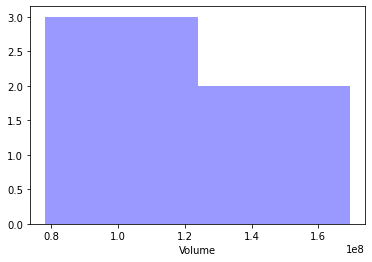

In [22]:
import seaborn as sns
#The visualization of stock voume distribution.
sns.distplot(df_dr['Volume'],color='Blue', kde=False)

In [23]:
import re
from io import StringIO
from datetime import datetime, timedelta

import requests
import pandas as pd


class YahooFinanceHistory:
    timeout = 2
    crumb_link = 'https://finance.yahoo.com/quote/{0}/history?p={0}'
    crumble_regex = r'CrumbStore":{"crumb":"(.*?)"}'
    quote_link = 'https://query1.finance.yahoo.com/v7/finance/download/{quote}?period1={dfrom}&period2={dto}&interval=1d&events=history&crumb={crumb}'

    def __init__(self, symbol, days_back=7):
        self.symbol = symbol
        self.session = requests.Session()
        self.dt = timedelta(days=days_back)

    def get_crumb(self):
        response = self.session.get(self.crumb_link.format(self.symbol), timeout=self.timeout)
        response.raise_for_status()
        match = re.search(self.crumble_regex, response.text)
        if not match:
            raise ValueError('Could not get crumb from Yahoo Finance')
        else:
            self.crumb = match.group(1)

    def get_quote(self):
        if not hasattr(self, 'crumb') or len(self.session.cookies) == 0:
            self.get_crumb()
        now = datetime.utcnow()
        dateto = int(now.timestamp())
        datefrom = int((now - self.dt).timestamp())
        url = self.quote_link.format(quote=self.symbol, dfrom=datefrom, dto=dateto, crumb=self.crumb)
        response = self.session.get(url)
        response.raise_for_status()
        return pd.read_csv(StringIO(response.text), parse_dates=['Date'])

In [24]:
# Get the data
df_re = YahooFinanceHistory('AAPL', days_back=30).get_quote()
df_re

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000
1,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73604300
2,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300
3,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200
4,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200
5,2020-11-27,116.570000,117.489998,116.220001,116.589996,116.589996,46691300
6,2020-11-30,116.970001,120.970001,116.809998,119.050003,119.050003,169410200
7,2020-12-01,121.010002,123.470001,120.010002,122.720001,122.720001,128166800
8,2020-12-02,122.019997,123.370003,120.889999,123.080002,123.080002,89004200
9,2020-12-03,123.519997,123.779999,122.209999,122.940002,122.940002,78967600


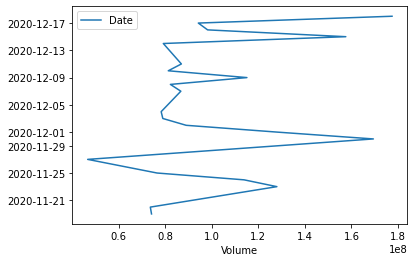

In [25]:
#The visualization of stock volume Vs Date.
lines = df_re.plot.line(x='Volume', y='Date')

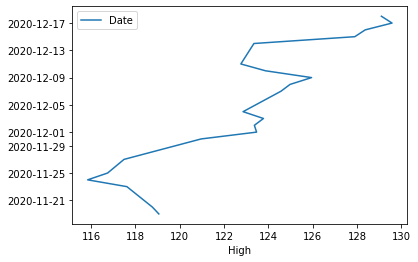

In [26]:
#The line graph of high stock Vs Date.
lines = df_re.plot.line(x='High', y='Date')

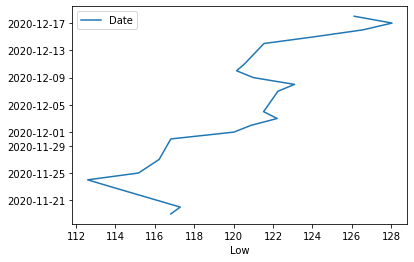

In [27]:
#The line graph of Low stock Vs Date.
lines = df_re.plot.line(x='Low', y='Date')

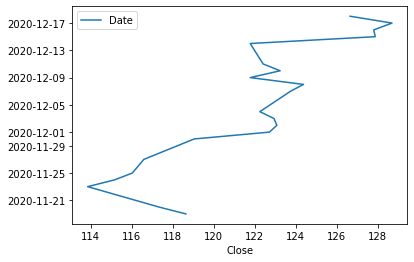

In [28]:
#The line graph of Close Price Vs Date.
lines = df_re.plot.line(x='Close', y='Date')

# The change in price of the stock over time.

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [30]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [31]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400.0,69.336212,APPLE
2019-12-19,70.294998,69.737503,69.875000,70.004997,98369200.0,69.405609,APPLE
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,69.261856,APPLE
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,70.392090,APPLE
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.459007,APPLE


In [32]:
#Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,94.591555,91.924636,93.233976,93.326309,1.567621e+08,93.002549
std,21.414135,20.860864,21.316239,21.117040,7.130151e+07,21.259065
min,57.125000,53.152500,57.020000,56.092499,2.415860e+07,55.744217
25%,76.011250,74.310001,75.094376,75.289375,1.096560e+08,74.805262
50%,89.502499,87.779999,88.486252,88.308750,1.381294e+08,87.997997
75%,116.512503,113.565001,115.040003,115.047503,1.870393e+08,114.849358
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [33]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-18 to 2020-12-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


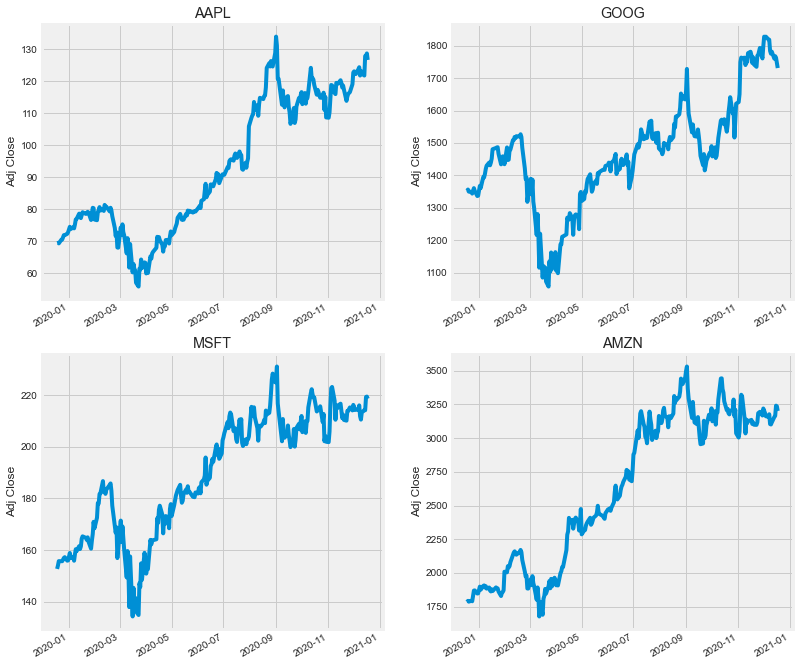

In [34]:
#Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

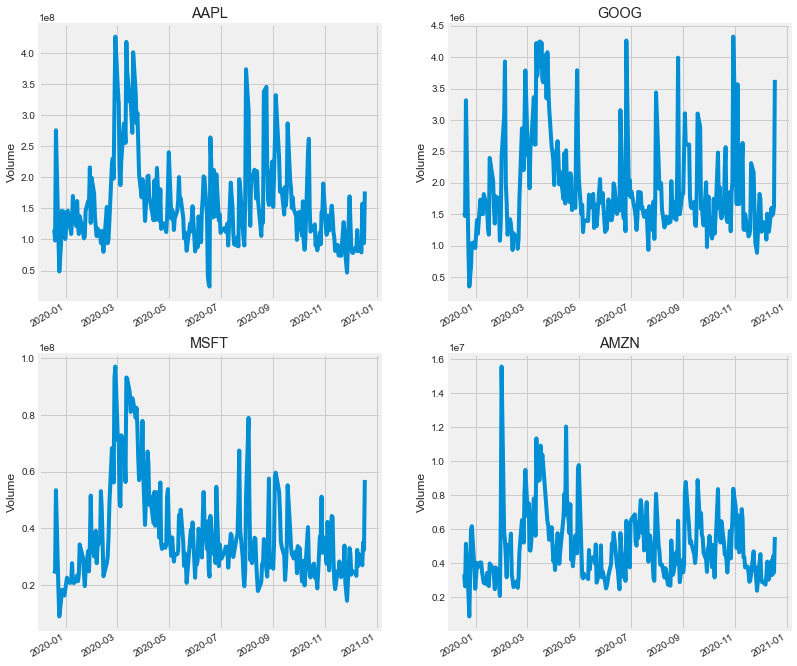

In [35]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# The moving average of the various stocks.

In [36]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [37]:
print(AAPL.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


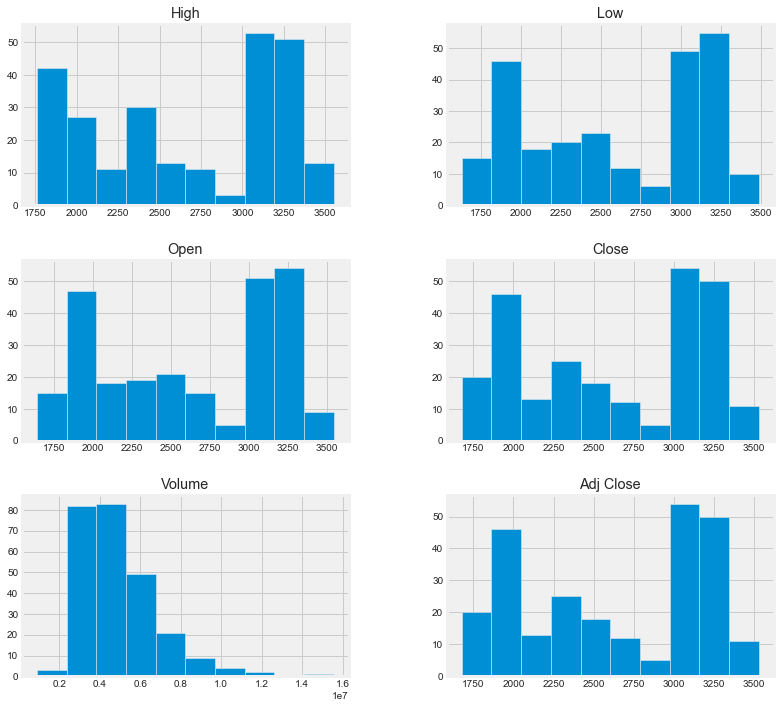

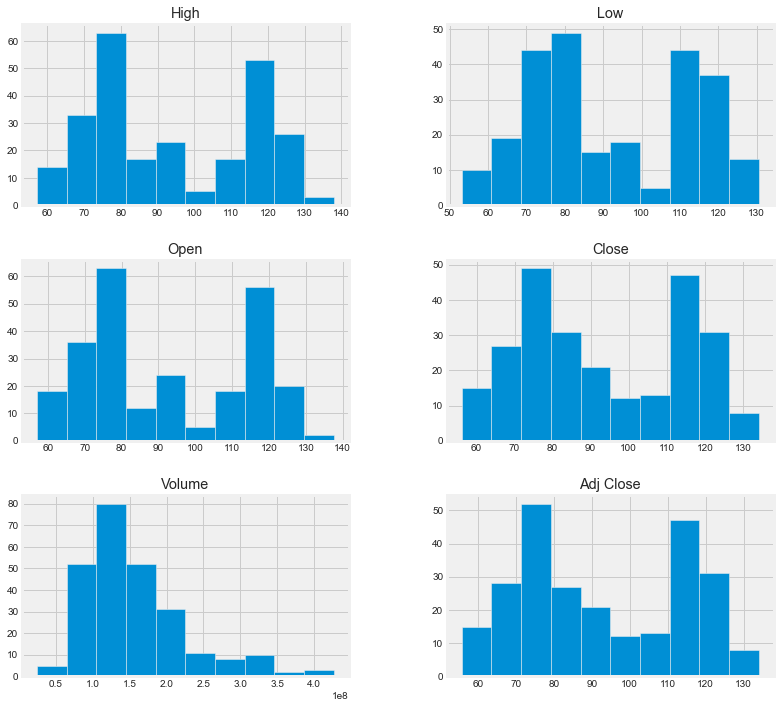

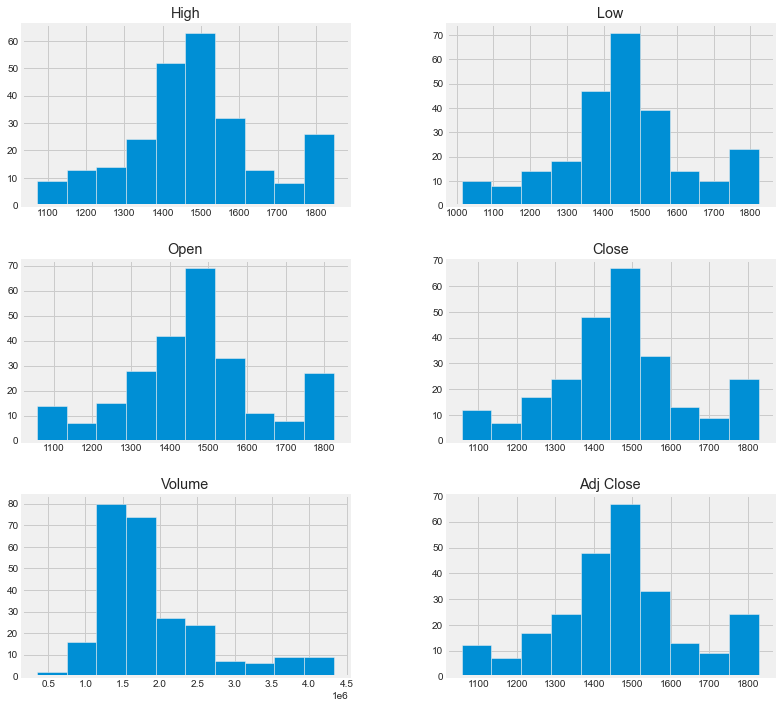

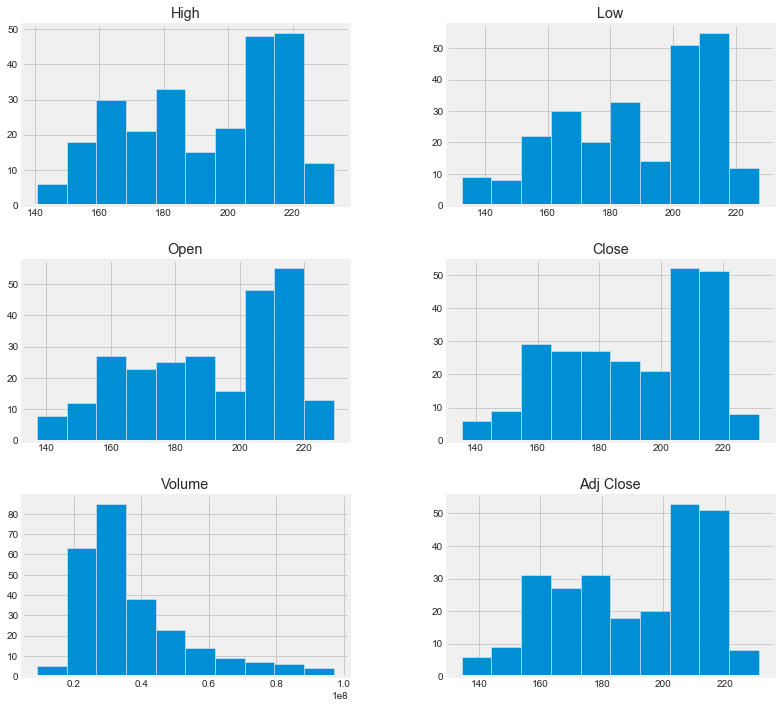

In [38]:
df.groupby("company_name").hist(figsize=(12, 12));

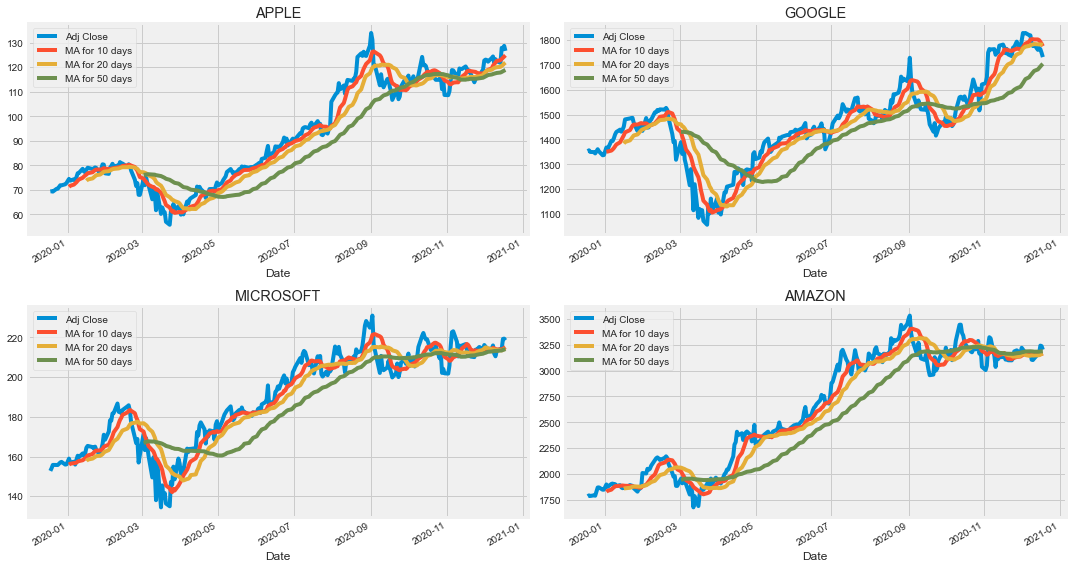

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# The daily return of the stock on average.

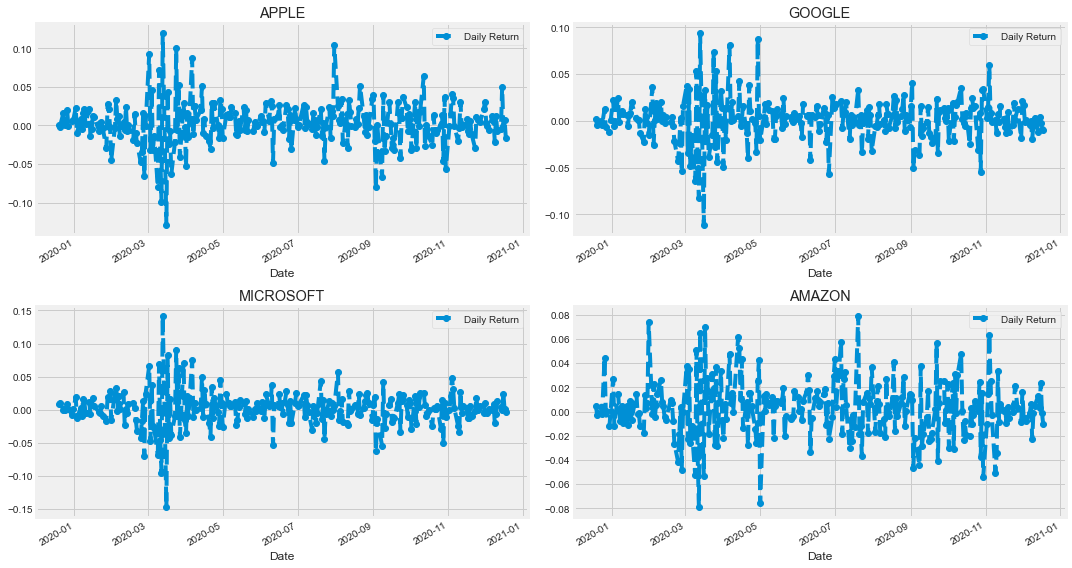

In [40]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

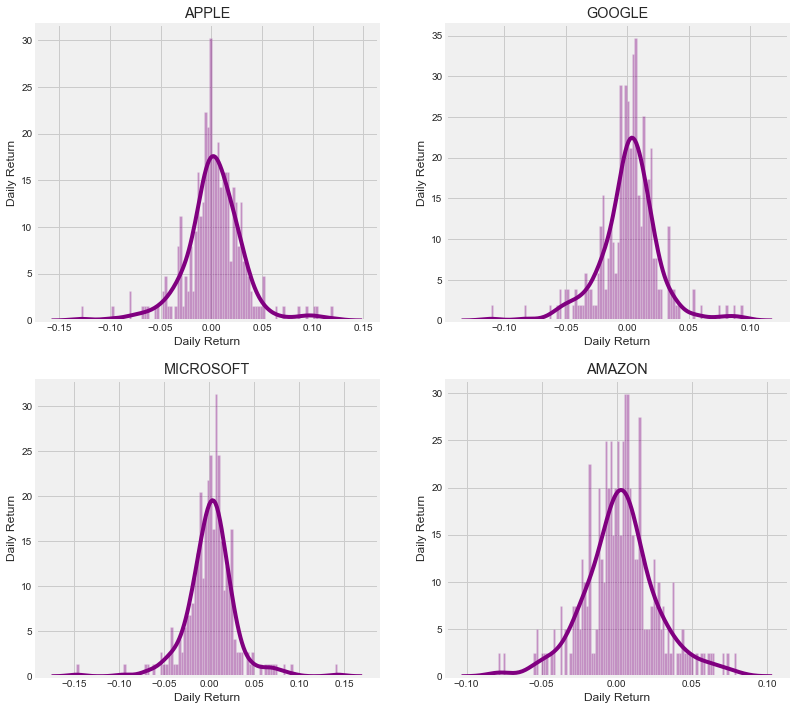

In [41]:
#the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

# The correlation between different stocks closing prices.

Build a DataFrame with all the 'Close' columns for each of the stocks dataframes.


In [42]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-18,69.336212,1352.619995,152.751816,1784.030029
2019-12-19,69.405609,1356.040039,154.077759,1792.280029
2019-12-20,69.261856,1349.589966,155.759949,1786.500000
2019-12-23,70.392090,1348.839966,155.759949,1793.000000
2019-12-24,70.459007,1343.560059,155.730255,1789.209961
...,...,...,...,...
2020-12-14,121.779999,1760.060059,214.199997,3156.969971
2020-12-15,127.879997,1767.770020,214.130005,3165.120117
2020-12-16,127.809998,1763.000000,219.279999,3240.959961


We have all the closing prices. Now, get the daily return for all the stocks, like we did for the Apple stock.

In [43]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-18,NaN,NaN,NaN,NaN
2019-12-19,0.001001,0.002528,0.008680,0.004624
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225
2019-12-23,0.016318,-0.000556,0.000000,0.003638
2019-12-24,0.000951,-0.003914,-0.000191,-0.002114


Now we can compare the daily percentage return of two stocks to check how correlated.

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


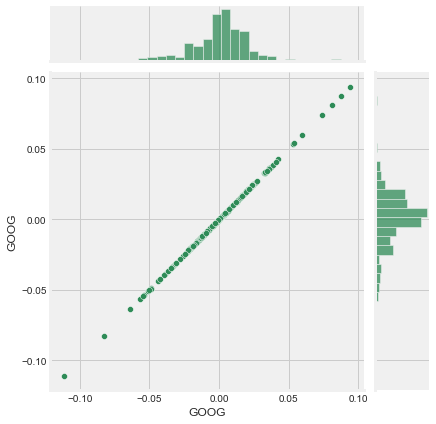

In [44]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


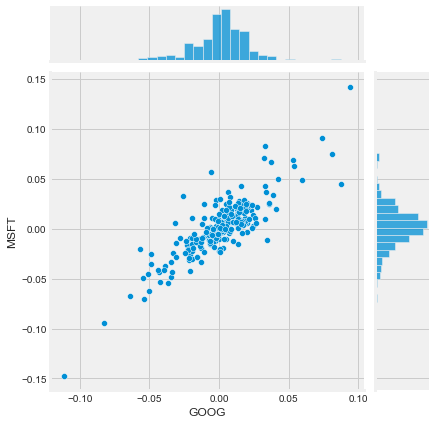

In [45]:
#We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind ='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

We can see all the relationships on daily returns between all the stocks.

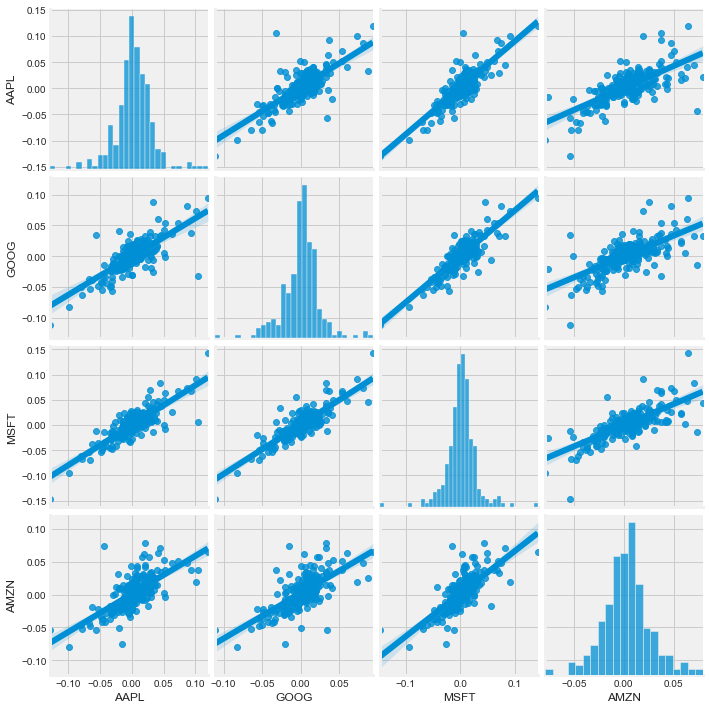

In [46]:
#We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

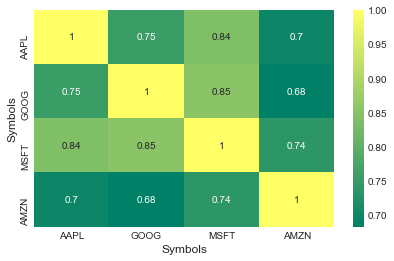

In [47]:
#used seaborn for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

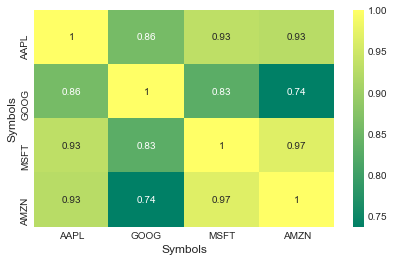

In [48]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# How much value do we put at risk by investing in a particular stock?

We've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

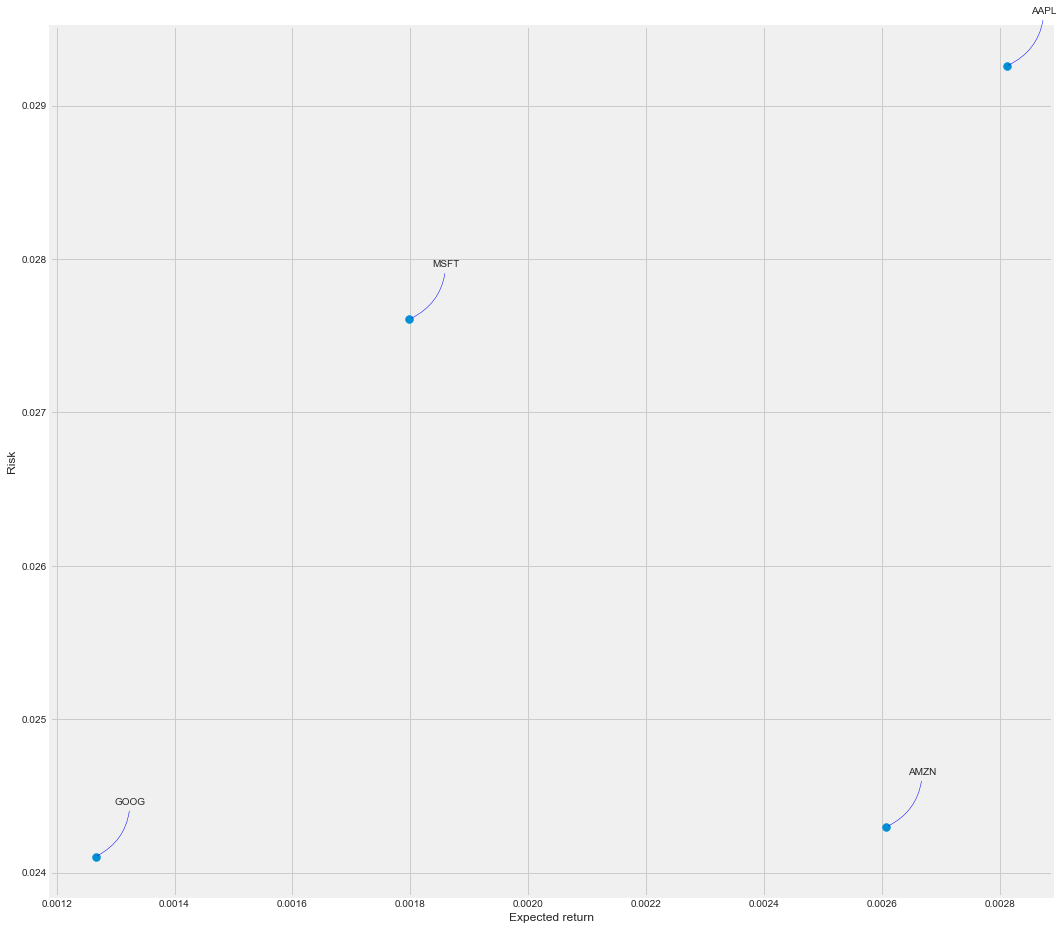

In [49]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(16, 16))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of APPLE inc:

In [50]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.779999
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.809998


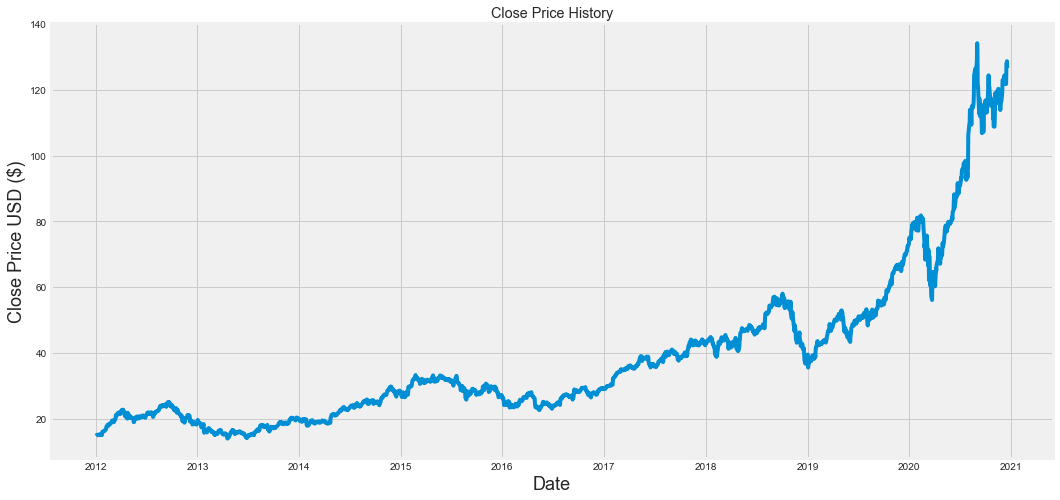

In [51]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [54]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1806

In [55]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.94701935],
       [0.95442167],
       [0.93741298]])

In [56]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [57]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1746/1746 [==============================] - 21s 12ms/step - loss: 2.4043e-04


In [59]:
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.390514358347144

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


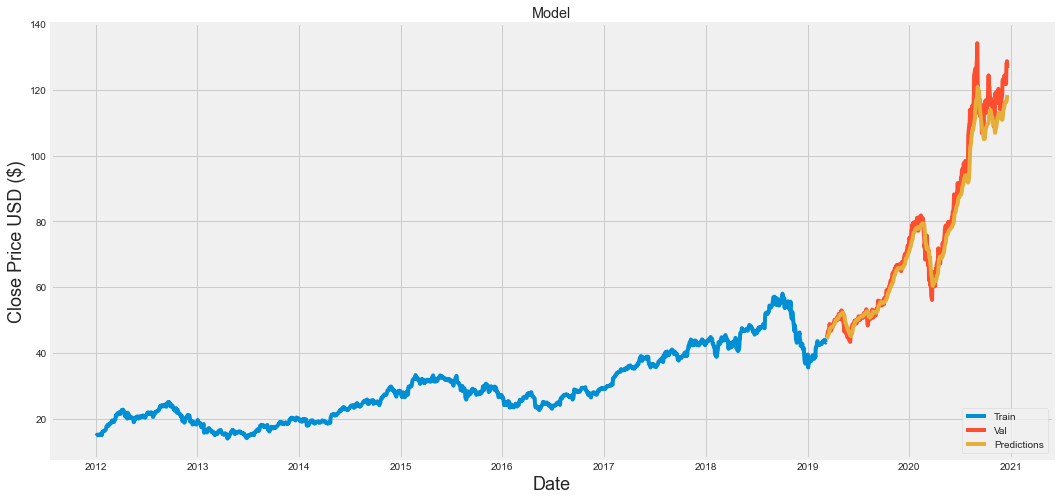

In [60]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-11,44.724998,44.304230
2019-03-12,45.227501,44.404156
2019-03-13,45.427502,44.628128
2019-03-14,45.932499,44.913322
2019-03-15,46.529999,45.255054
...,...,...
2020-12-14,121.779999,116.376793
2020-12-15,127.879997,116.253716
2020-12-16,127.809998,116.828384


I started this project with the hope to learn a completely new algorithm, i.e., Long-Short Term Memory and to explore a real time series data set. The final model really exceeded my expectation and have worked remarkably well. I am greatly satisfied with these results. The major problem I faced during the implementation of project was exploring the data. It was toughest task. To convert data from raw format to preprocess data and then to split them into training and test data. All these steps require a great deal of patience and very precise approach. Also, I had to work around a lot to successfully use the data for 2 models, i.e., Linear Regression and Long-Short Term Memory, as both have different inputs sizes. I read many research papers to get this final model right and I think it was all worth it.